In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gen_rand_data(size = 200):
    tid = range(size)
    release_year = np.random.randint(1950, 2020, size=size)
    rating = np.random.rand(size) * 100
    num_in_series = np.random.choice([1, 2, 3, 6], p=[.8, .1, .05, .05], size=size)
    released_internationally = np.random.choice(["Yes", "No"], p=[.75, .25], size=size)

    profit = np.zeros(shape=(size))
    profit += (release_year-1950)*10000
    profit += rating*10000
    series_profit = {1: 70000, 2: 40000, 3: 20000, 6: 80000}
    profit += np.array([series_profit[item] for item in num_in_series])

    # plt.scatter(release_year, profit)
    # plt.subplots()
    profit = np.array([val if international=="Yes" else val*.5 for (val, international) in zip(profit, released_internationally)])
    # plt.scatter(release_year, profit)

    profit += np.random.normal(0, 50000, size=size)

    success = profit > np.quantile(profit, .6)
    
    data = {"ID": tid,
        "Year": release_year,
        "Rating": rating,
        "Number": num_in_series,
        "International": released_internationally,
        "Profit": profit,
        "Success": success}
    return pd.DataFrame(data)

attributes = ["Year", "Rating", "Number", "International"]

In [3]:
df = gen_rand_data(500)
df.head()

,ID,Year,Rating,Number,International,Profit,Success
0,0,2017,42.918210,6,Yes,1.191064e+06,True
1,1,1973,5.394364,2,Yes,3.358394e+05,False
2,2,1967,81.876930,1,Yes,1.120659e+06,True
3,3,1952,43.094374,1,No,2.855641e+05,False
4,4,1971,9.889879,3,Yes,3.197752e+05,False


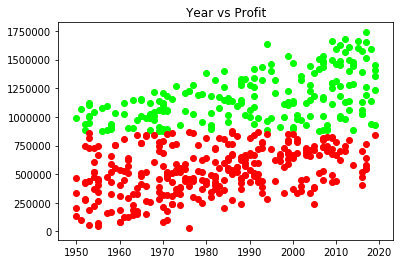

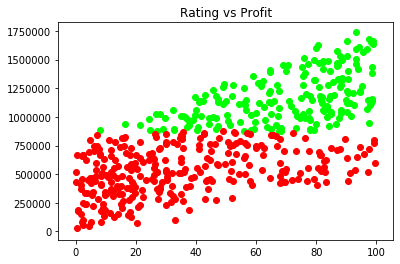

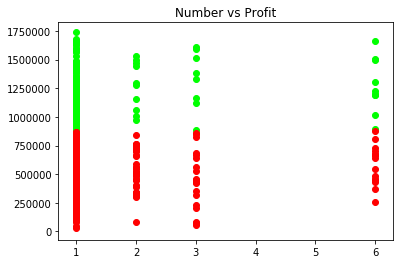

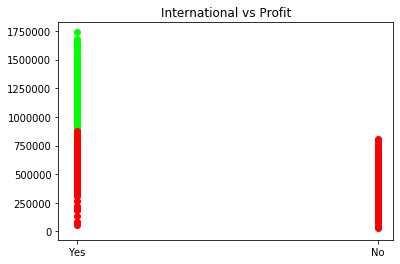

In [4]:
successes = df[df["Success"]]
failures = df[df["Success"] == False]

for colName in attributes:
    plt.subplots()
    plt.title(colName + " vs Profit")
    plt.scatter(successes[colName], successes["Profit"], color="lime")
    plt.scatter(failures[colName], failures["Profit"], color="red")
    
# for colName in data:
#     plt.subplots()
#     plt.title(colName + " vs Success")
#     plt.scatter(data[colName], data["Success"])

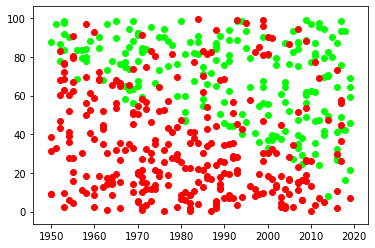

In [5]:
plt.scatter(successes["Year"], successes["Rating"], color="lime")
plt.scatter(failures["Year"], failures["Rating"], color="red")

In [6]:
X = df[attributes].copy()
X["International"] = X["International"].map({"Yes": 1, "No": 0})
Y = df["Success"].copy()
Y_cont = df["Profit"].copy()
X.head()

,Year,Rating,Number,International
0,2017,42.918210,6,1
1,1973,5.394364,2,1
2,1967,81.876930,1,1
3,1952,43.094374,1,0
4,1971,9.889879,3,1


In [7]:
testing = gen_rand_data(200)
df_total = df.append(testing, sort=False)
df_total["International"] = df_total["International"].map({"Yes": 1, "No": 0, 1: 1, 0: 0})

X_with_testing = df_total[attributes]
X_with_testing.head()

,Year,Rating,Number,International
0,2017,42.918210,6,1
1,1973,5.394364,2,1
2,1967,81.876930,1,1
3,1952,43.094374,1,0
4,1971,9.889879,3,1


logistic regression  
decision tree  
support vector

### Logistic Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg_model = LinearRegression()
reg_model.fit(X, Y_cont)
reg_score = reg_model.score(X, Y_cont)
print("Score:", reg_score)

Score: 0.9373423965011244


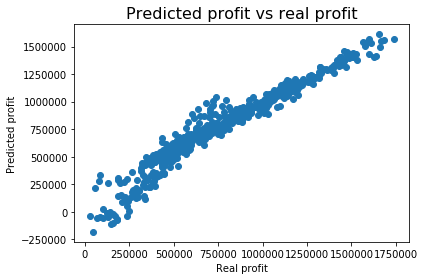

In [21]:
reg_yhat = reg_model.predict(X)

plt.xlabel("Real profit")
plt.ylabel("Predicted profit")
plt.title("Predicted profit vs real profit", fontsize=16)
plt.scatter(Y_cont, reg_yhat);

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X, Y)
dt_accuracy = DT_model.score(X, Y)
print("Accuracy:", dt_accuracy)

Accuracy: 1.0


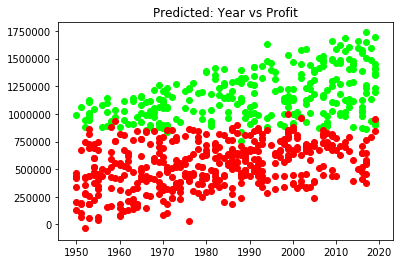

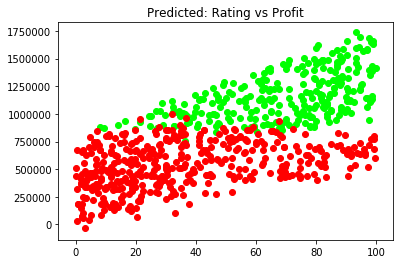

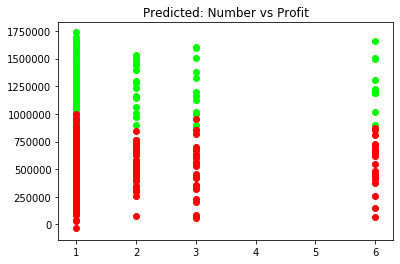

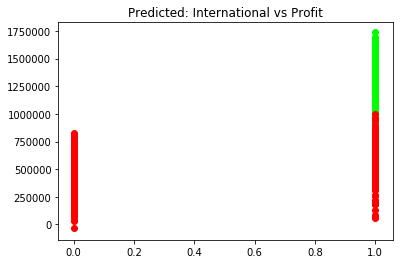

In [13]:
dt_yhat = DT_model.predict(X_with_testing)

dt_successhat = df_total[dt_yhat]
dt_failhat = df_total[dt_yhat == False]

for colName in attributes:
    plt.subplots()
    plt.title("Predicted: " + colName + " vs Profit")
    plt.scatter(dt_successhat[colName], dt_successhat["Profit"], color="lime")
    plt.scatter(dt_failhat[colName], dt_failhat["Profit"], color="red")

### Support Vector Machine

In [14]:
from sklearn.svm import SVC

In [15]:
SVM_model = SVC(gamma = "auto")
#this next line may take a while:
SVM_model.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
SVM_accuracy = SVM_model.score(X, Y)
print("Accuracy:", SVM_accuracy)

Accuracy: 0.988


In [17]:
SVM_model.predict([[2020, 95, 1, 1]])

array([False])

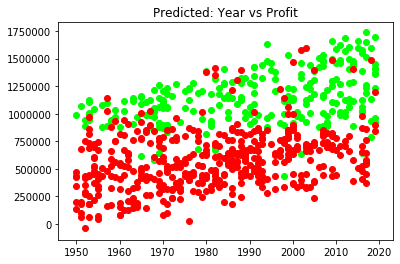

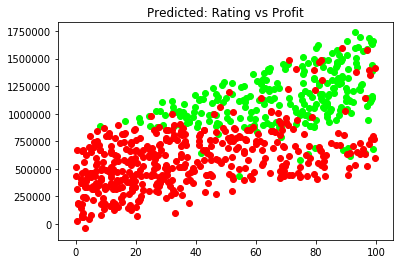

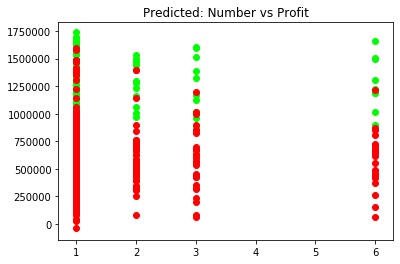

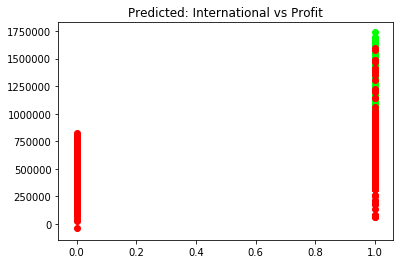

In [18]:
yhat = SVM_model.predict(X_with_testing)

successhat = df_total[yhat]
failhat = df_total[yhat == False]

for colName in attributes:
    plt.subplots()
    plt.title("Predicted: " + colName + " vs Profit")
    plt.scatter(successhat[colName], successhat["Profit"], color="lime")
    plt.scatter(failhat[colName], failhat["Profit"], color="red")
